In [5]:
# This notebook is to plot the learning rate 
# Trying to understand how warmup works
import matplotlib.pyplot as plt 
from torch.optim import Adam

In [8]:
%%capture 
%run ../config/config.ipynb
%run ../src/Transformer.ipynb

In [22]:
# plot the lr rate change caused by scheduler 

# we don't execute optimizer.step(), 
# which optimizer doesn't do weight decay
def scheduler_lr_plot(optimizer, scheduler, total_steps): 
    # store the lr for overall steps 
    lr_history = []
    steps = range(1, total_steps + 1)

    for step in steps: 
        lr_history.append(optimizer.param_groups[0]["lr"])
        scheduler.step()

    # plot the lr_history 
    plt.figure()

    plt.plot(steps, lr_history, linewidth=2, alpha=0.35, label="Learning Rate")
    plt.ylim(-0.1 * max(lr_history), 1.2 * max(lr_history))
    plt.xlabel("Steps")
    plt.ylabel("lr")
    plt.grid()
    plt.legend()
    plt.show()

In [23]:
# model = Transformer(
#     src_pad_token=src_pad_token, 
#     trg_pad_token=trg_pad_token, 
#     enc_voc_size=enc_voc_size, 
#     dec_voc_size=dec_voc_size, 
#     n_head=n_head, 
#     max_len=max_len, 
#     d_model=d_model, 
#     ffn_hidden=ffn_hidden, 
#     n_layers=n_layers, 
#     drop_prob=drop_prob, 
#     device=device).to(device)

# test_optimizer = Adam(params=model.parameters(), lr=init_lr, weight_decay=weight_decay, eps=eps, betas=(0.9, 0.98))
# test_scheduler = LRScheduler(test_optimizer, d_model, warmup_steps)

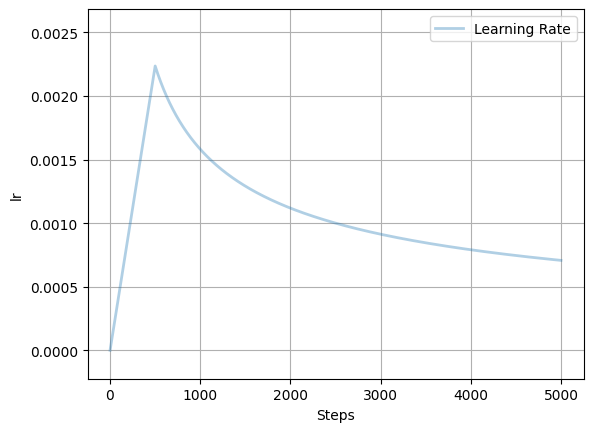

In [24]:
# scheduler_lr_plot(test_optimizer, test_scheduler, 5000)